## Clean and filter data

In [48]:
import pandas as pd 
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.feature_selection import SelectKBest
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.feature_selection import f_regression
from sklearn.model_selection import train_test_split

### Perform data quality checks

In [49]:
df = pd.read_csv('../data/data.csv')

df = df.drop(['Country', 'Region', 'Year'], axis=1)

# Check for duplicate rows
duplicate = df.duplicated()

# Check for missing values
nan_values = df.isna()

# Check for negative values in numerical columns
negative_values = (df.select_dtypes(include='number') < 0)

# Check for zero values in numerical columns
zero_values = (df.select_dtypes(include='number') == 0)

# Check for values greater than 100 and less than 0 in columns given in percentage
percentage_values = (df[['Hepatitis_B', 'Measles', 'Polio', 'Diphtheria']] > 100) | (df[['Hepatitis_B', 'Measles', 'Polio', 'Diphtheria']] < 0)

# Check for any rows where both 'Economy_status_Developed' and 'Economy_status_Developing' are 1
mutual_status_count = df[(df['Economy_status_Developed'] == 1) &
                                 (df['Economy_status_Developing'] == 1)].shape[0]

# Check for rows where both values are 0
neither_status_count = df[(df['Economy_status_Developed'] == 0) &
                                  (df['Economy_status_Developing'] == 0)].shape[0]

print("Dataset Quality Checks:\n")
print(f"1. Number of duplicate rows: ", duplicate.sum(), "\n")

print("2. Missing Values: ", nan_values.sum().sum(),  "\n")

print("3. Negative Values: ", negative_values.sum().sum(),  "\n")

print("4. Zero Values in Numerical Columns:", zero_values.sum(),  "\n")

print("5. Values Greater Than 100 or Less Than 0 in Percentage Columns (Hepatitis_B, Measles, Polio, Diphtheria):", percentage_values.sum().sum(), "\n")

print("6. Economy Status Conflicts:")
print(f"   - Rows where both 'Economy_status_Developed' and 'Economy_status_Developing' are 1: ", mutual_status_count)
print(f"   - Rows where both are 0: ", neither_status_count)


Dataset Quality Checks:

1. Number of duplicate rows:  0 

2. Missing Values:  0 

3. Negative Values:  0 

4. Zero Values in Numerical Columns: Infant_deaths                     0
Under_five_deaths                 0
Adult_mortality                   0
Alcohol_consumption              38
Hepatitis_B                       0
Measles                           0
BMI                               0
Polio                             0
Diphtheria                        0
Incidents_HIV                     0
GDP_per_capita                    0
Population_mln                    0
Thinness_ten_nineteen_years       0
Thinness_five_nine_years          0
Schooling                         0
Economy_status_Developed       2272
Economy_status_Developing       592
Life_expectancy                   0
dtype: int64 

5. Values Greater Than 100 or Less Than 0 in Percentage Columns (Hepatitis_B, Measles, Polio, Diphtheria): 0 

6. Economy Status Conflicts:
   - Rows where both 'Economy_status_Developed' and 

### Exporatory data analysis

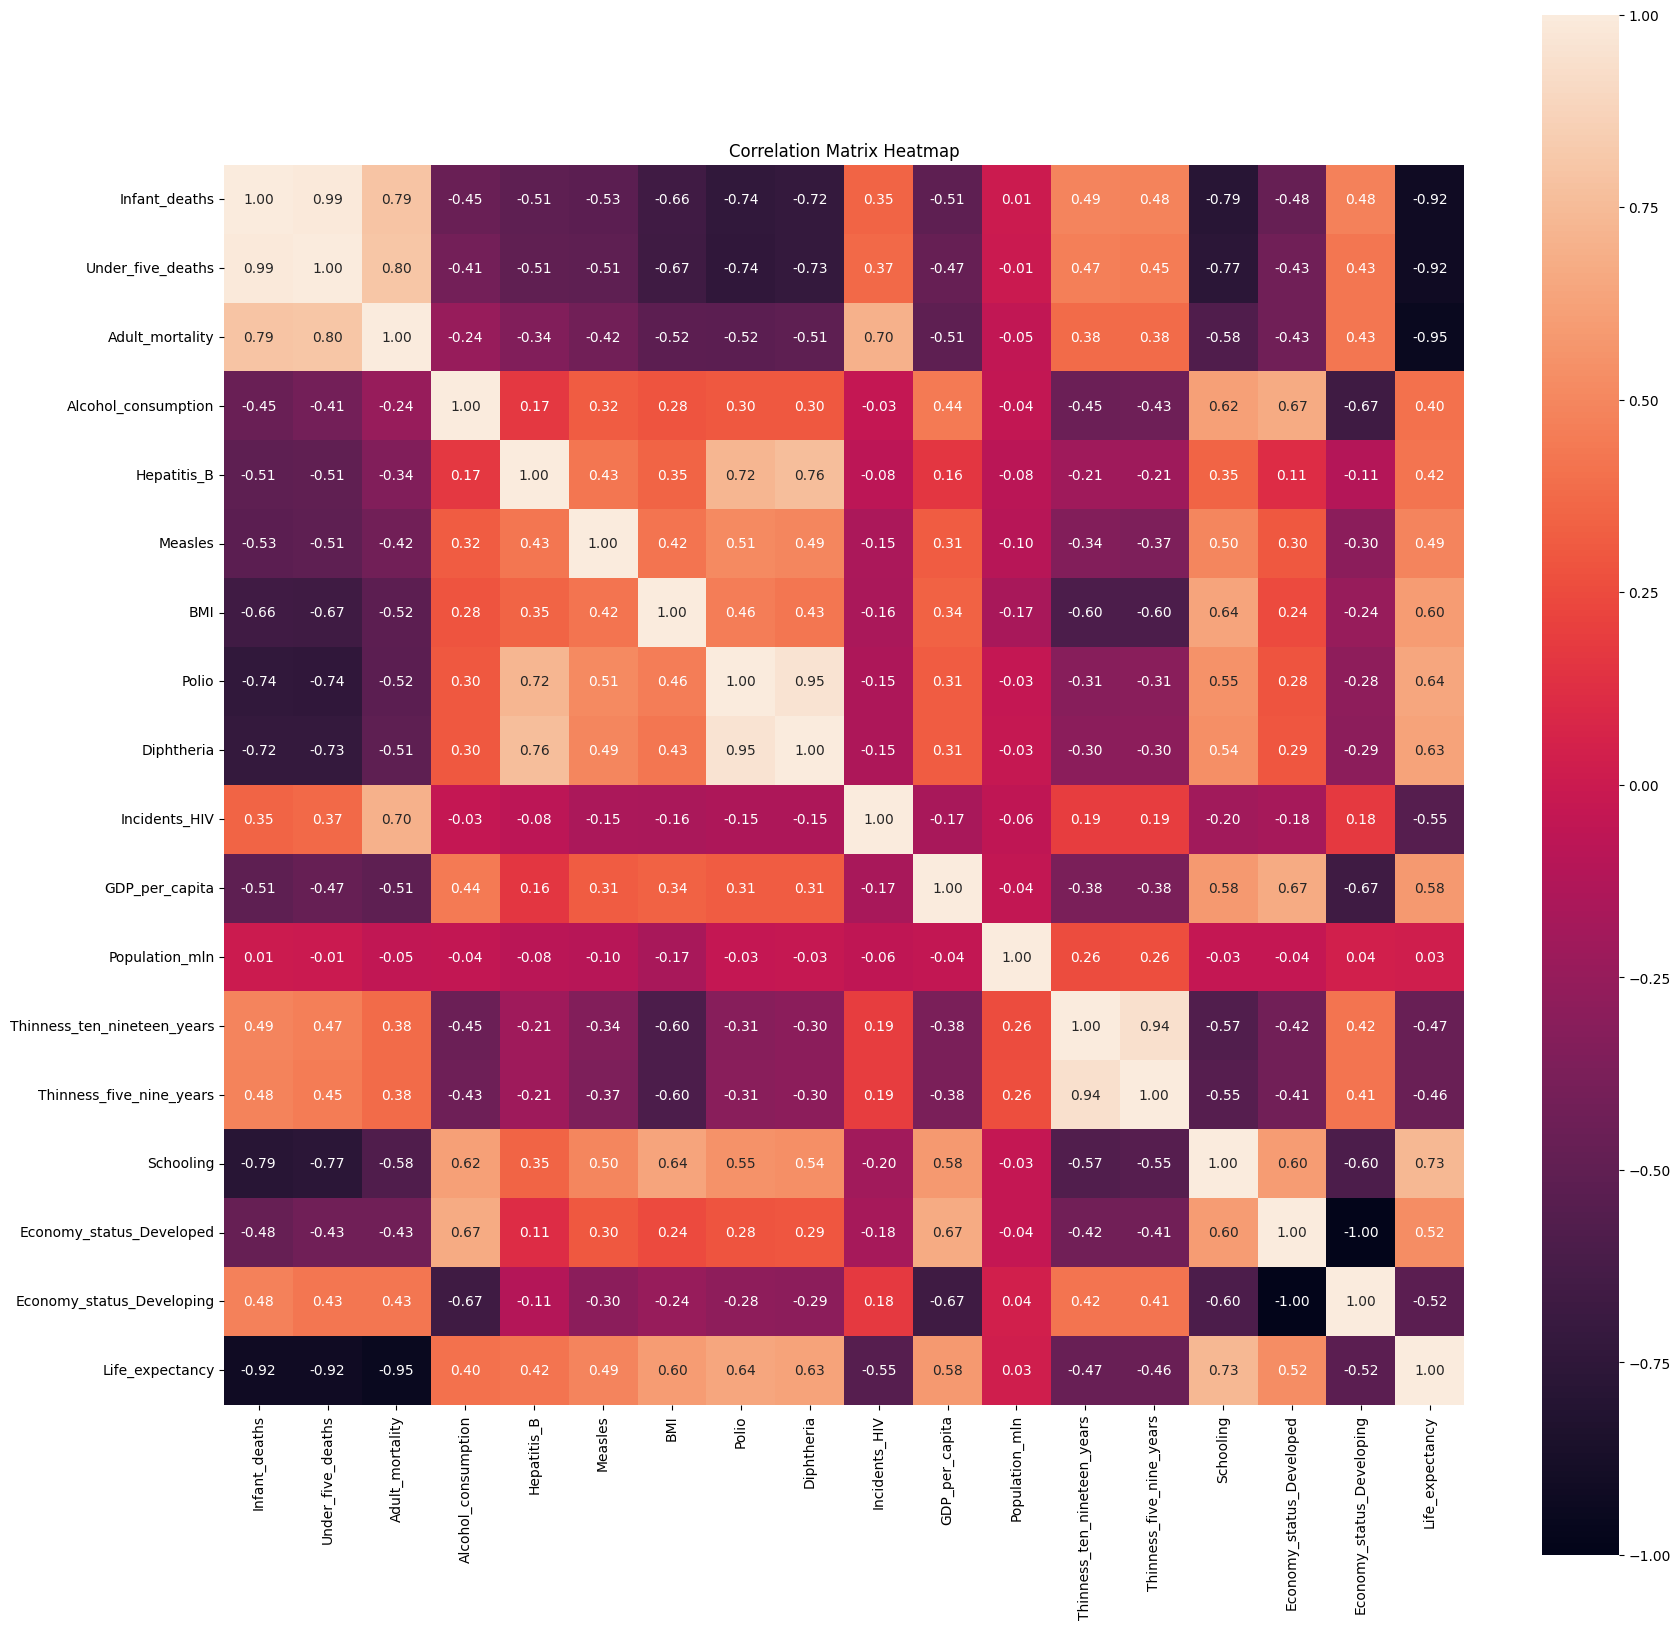

In [50]:
# Create a correlation matrix heatmap
# 1 indicates a perfect positive correlation, -1 indicates a perfect negative correlation, and 0 indicates no correlation
correlation_matrix = df.corr()

plt.figure(figsize=(20, 20))
sns.heatmap(correlation_matrix, annot=True, fmt='.2f', cbar=True, square=True)
plt.title('Correlation Matrix Heatmap')
plt.show()

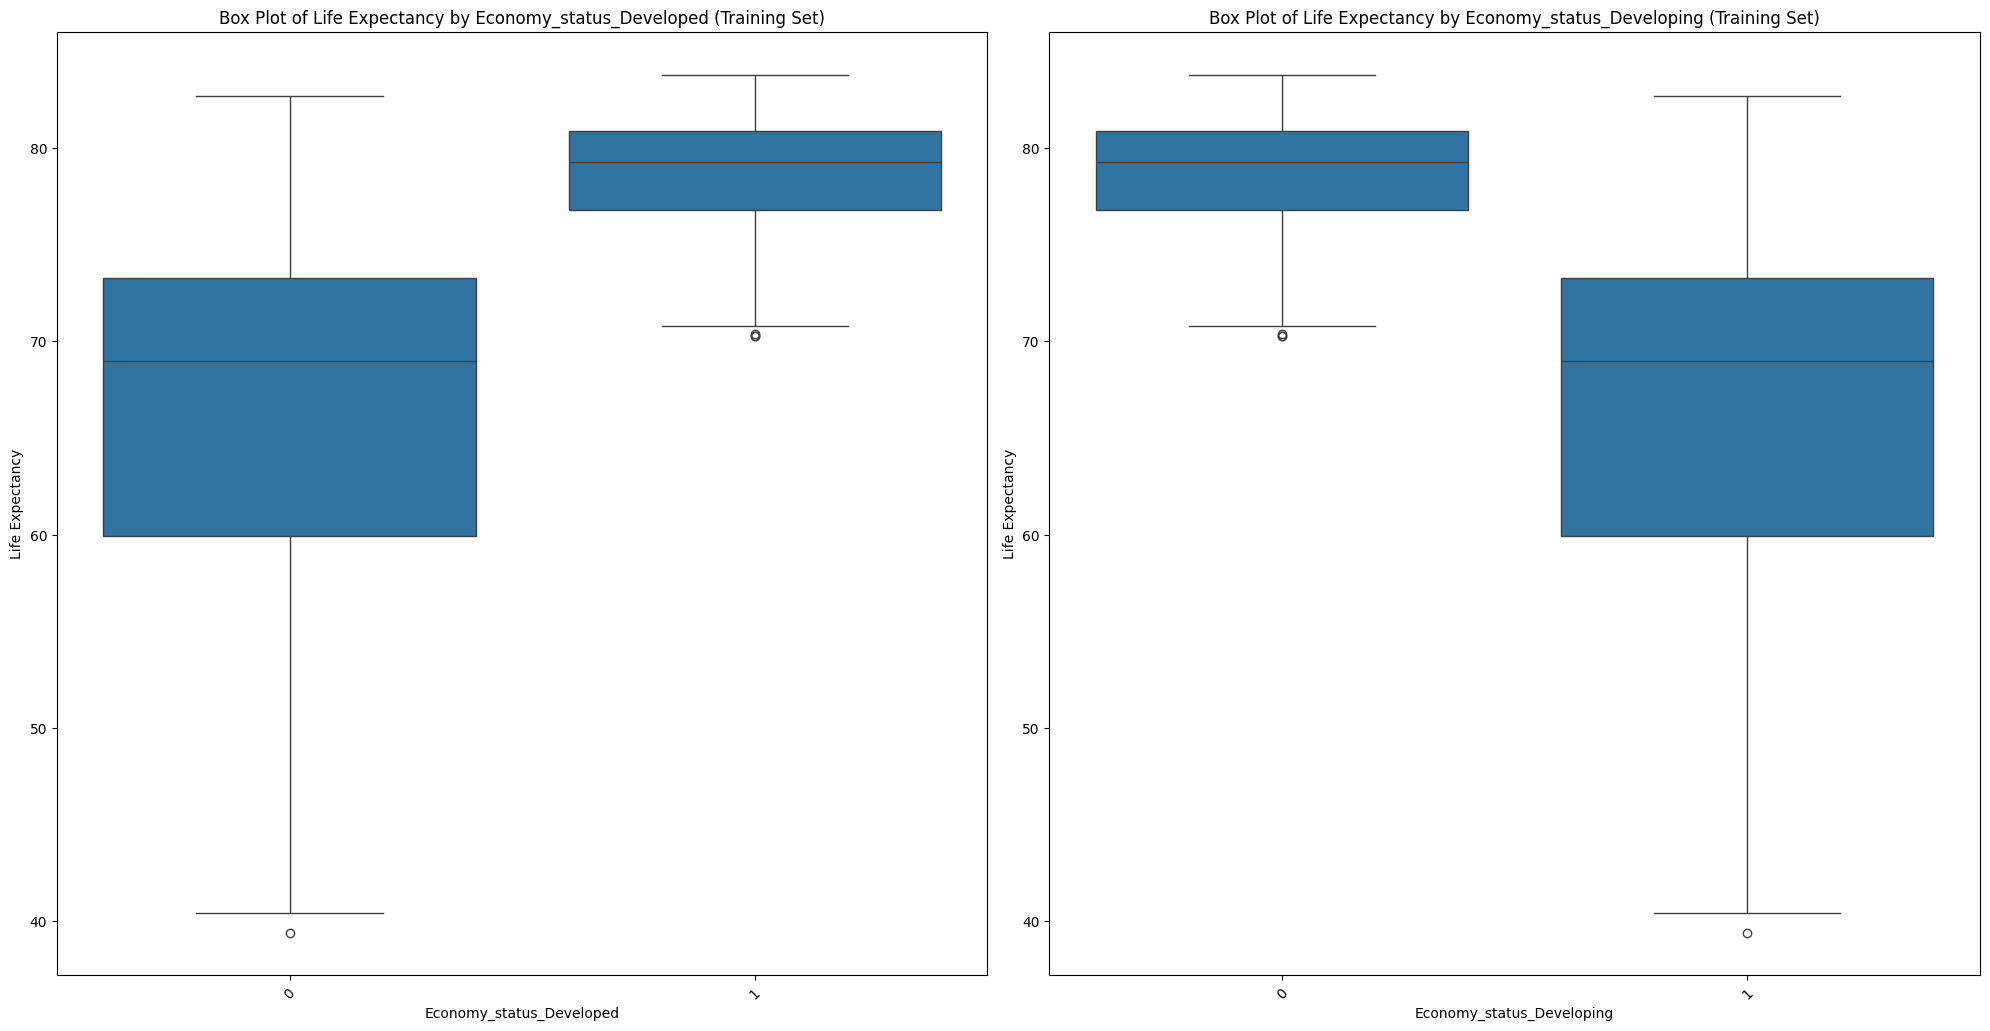

In [51]:
# Box plot of 'Life_expectancy' by 'Economy_status'
features = ['Economy_status_Developed', 'Economy_status_Developing']

plt.figure(figsize=(20, 20))

for i, feature in enumerate(features, 1):
    plt.subplot(2, 2, i)  
    sns.boxplot(x=feature, y='Life_expectancy', data=df)
    plt.title(f"Box Plot of Life Expectancy by {feature} (Training Set)")
    plt.xlabel(feature)
    plt.ylabel("Life Expectancy")
    plt.xticks(rotation=45)

plt.tight_layout()
plt.show()

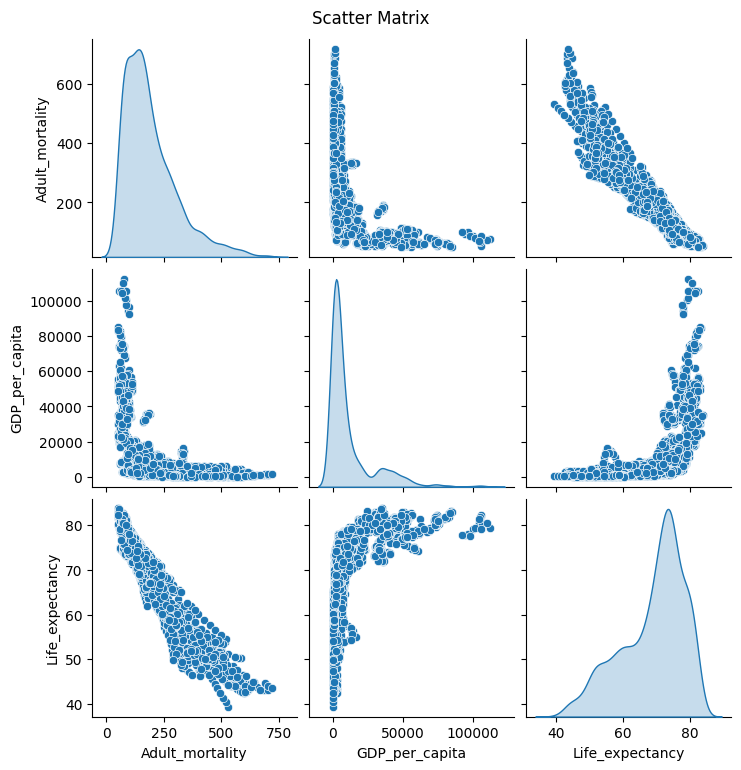

In [52]:
# Create scatter matrix (pairplot) of numerical columns, compared to 'Life_expectancy'
features = df[['Adult_mortality', 'GDP_per_capita']].copy()
features['Life_expectancy'] = df['Life_expectancy']

sns.pairplot(features, diag_kind='kde', markers='o')
plt.suptitle('Scatter Matrix', y=1.02)
plt.show()


### Original Data

Random Forest Regression Results (Original Data):
Mean Absolute Error (MAE): 0.3542
Mean Squared Error (MSE): 0.2375
R² Score: 0.9971

Linear Regression Results (Original Data):
Mean Absolute Error (MAE): 1.0924
Mean Squared Error (MSE): 1.8530
R² Score: 0.9777

K-Nearest Neighbors Regression Results (Original Data):
Mean Absolute Error (MAE): 0.4569
Mean Squared Error (MSE): 0.5098
R² Score: 0.9939


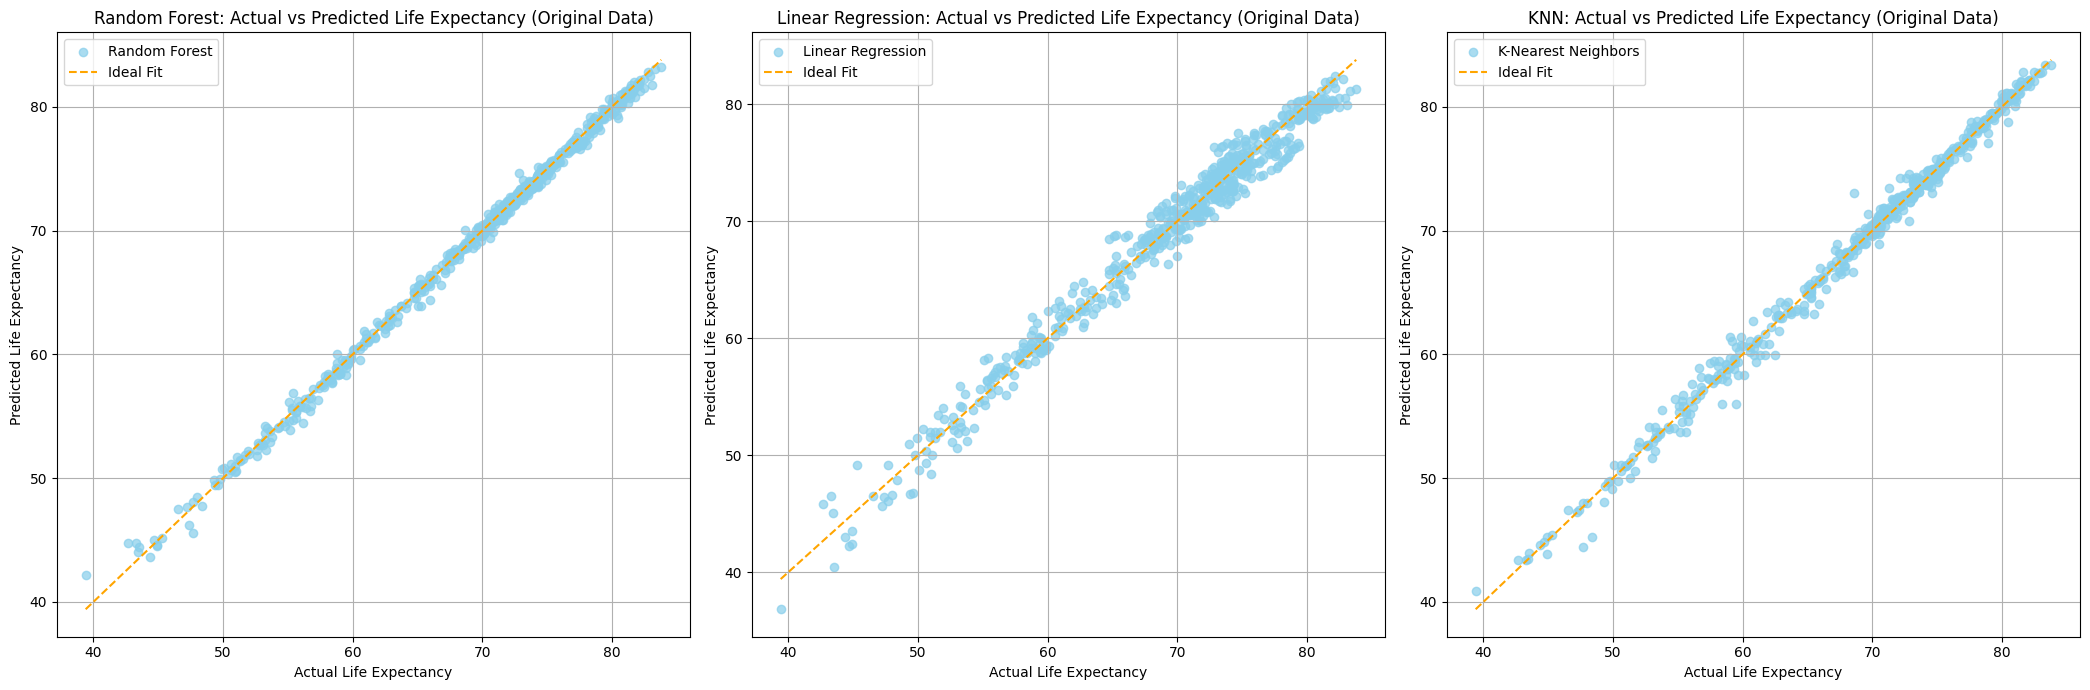

In [53]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.neighbors import KNeighborsRegressor

df = pd.read_csv('../data/data.csv')

df = df.drop(['Country', 'Region', 'Year'], axis=1)

X = df.drop('Life_expectancy', axis=1)
y = df['Life_expectancy']

X_train_og, X_test_og, y_train_og, y_test_og = train_test_split(X, y, test_size=0.2, random_state=42)

# Scale the features
scaler_X = StandardScaler()
X_train_scaled_og = scaler_X.fit_transform(X_train_og)
X_test_scaled_og = scaler_X.transform(X_test_og)

# Random Forest Regressor
rf_og = RandomForestRegressor(n_estimators=100, random_state=42)
rf_og.fit(X_train_scaled_og, y_train_og)
y_pred_rf_og = rf_og.predict(X_test_scaled_og)

# Linear Regression model
lr_og = LinearRegression()
lr_og.fit(X_train_scaled_og, y_train_og)
y_pred_lr_og = lr_og.predict(X_test_scaled_og)

# K-Nearest Neighbors Regressor
knn_og = KNeighborsRegressor(n_neighbors=2)
knn_og.fit(X_train_scaled_og, y_train_og)
y_pred_knn_og = knn_og.predict(X_test_scaled_og)

# Calculate the error metrics for the Random Forest model
mae_rf_og = mean_absolute_error(y_test_og, y_pred_rf_og)
mse_rf_og = mean_squared_error(y_test_og, y_pred_rf_og)
r2_rf_og = r2_score(y_test_og, y_pred_rf_og)

# Calculate the error metrics for the Linear Regression model
mae_lr_og = mean_absolute_error(y_test_og, y_pred_lr_og)
mse_lr_og = mean_squared_error(y_test_og, y_pred_lr_og)
r2_lr_og = r2_score(y_test_og, y_pred_lr_og)

# Calculate the error metrics for the KNN model
mae_knn_og = mean_absolute_error(y_test_og, y_pred_knn_og)
mse_knn_og = mean_squared_error(y_test_og, y_pred_knn_og)
r2_knn_og = r2_score(y_test_og, y_pred_knn_og)

# Print the evaluation metrics
print("Random Forest Regression Results (Original Data):")
print(f"Mean Absolute Error (MAE): {mae_rf_og:.4f}")
print(f"Mean Squared Error (MSE): {mse_rf_og:.4f}")
print(f"R² Score: {r2_rf_og:.4f}")

print("\nLinear Regression Results (Original Data):")
print(f"Mean Absolute Error (MAE): {mae_lr_og:.4f}")
print(f"Mean Squared Error (MSE): {mse_lr_og:.4f}")
print(f"R² Score: {r2_lr_og:.4f}") 

print("\nK-Nearest Neighbors Regression Results (Original Data):")
print(f"Mean Absolute Error (MAE): {mae_knn_og:.4f}")
print(f"Mean Squared Error (MSE): {mse_knn_og:.4f}")
print(f"R² Score: {r2_knn_og:.4f}")

# Plot the two models' predictions against the actual values
plt.figure(figsize=(21, 7))

# Random Forest subplot
plt.subplot(1, 3, 1)
plt.scatter(y_test_og, y_pred_rf_og, alpha=0.7, label="Random Forest", color='skyblue')
plt.plot([y_test_og.min(), y_test_og.max()], [y_test_og.min(), y_test_og.max()], '--', label="Ideal Fit", color='orange')
plt.title("Random Forest: Actual vs Predicted Life Expectancy (Original Data)")
plt.xlabel("Actual Life Expectancy")
plt.ylabel("Predicted Life Expectancy")
plt.legend()
plt.grid(True)

# Linear Regression subplot
plt.subplot(1, 3, 2)
plt.scatter(y_test_og, y_pred_lr_og, alpha=0.7, label="Linear Regression", color='skyblue')
plt.plot([y_test_og.min(), y_test_og.max()], [y_test_og.min(), y_test_og.max()], '--', label="Ideal Fit", color='orange')
plt.title("Linear Regression: Actual vs Predicted Life Expectancy (Original Data)")
plt.xlabel("Actual Life Expectancy")
plt.ylabel("Predicted Life Expectancy")
plt.legend()
plt.grid(True)

# KNN subplot
plt.subplot(1, 3, 3)
plt.scatter(y_test_og, y_pred_knn_og, alpha=0.7, label="K-Nearest Neighbors", color='skyblue')
plt.plot([y_test_og.min(), y_test_og.max()], [y_test_og.min(), y_test_og.max()], '--', label="Ideal Fit", color='orange')
plt.title("KNN: Actual vs Predicted Life Expectancy (Original Data)")
plt.xlabel("Actual Life Expectancy")
plt.ylabel("Predicted Life Expectancy")
plt.legend()
plt.grid(True)

plt.tight_layout()
plt.show()

### Box-Cox Transformed Data

Random forest Regression Results (Box-Cox Transformed Data):
Mean Absolute Error (MAE): 0.3564
Mean Squared Error (MSE): 0.2459
R² Score: 0.9970

Linear Regression Results (Box-Cox Transformed Data):
Mean Absolute Error (MAE): 1.8212
Mean Squared Error (MSE): 10.7858
R² Score: 0.8700

K-Nearest Neighbors Regression Results (Original Data):
Mean Absolute Error (MAE): 0.5466
Mean Squared Error (MSE): 0.6374
R² Score: 0.9923


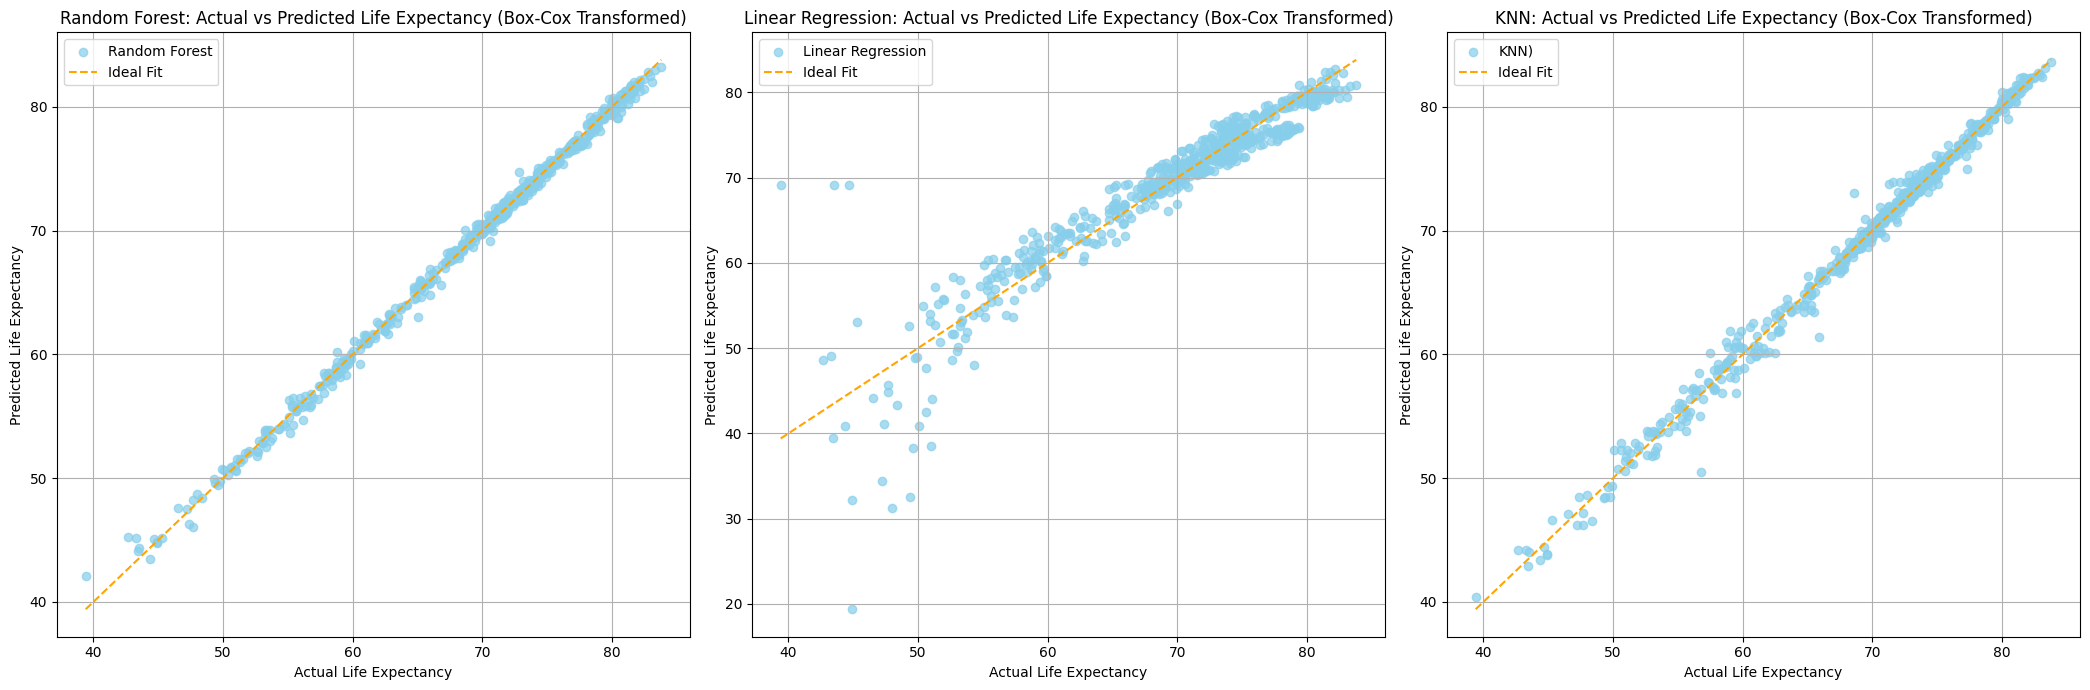

In [54]:
from scipy.stats import boxcox
from scipy.special import inv_boxcox
import numpy as np

df = pd.read_csv('../data/data.csv')

df = df.drop(['Country', 'Region', 'Year'], axis=1)

X = df.drop('Life_expectancy', axis=1)
y = df['Life_expectancy']

# Transform the target variable using Box-Cox
y_boxcox, lambda_val = boxcox(y)

# Update the feature matrix and transformed target
X_transformed = X
y_transformed = pd.Series(y_boxcox, name="Life_expectancy_BoxCox")

# Split the dataset into training and testing sets
X_train_bc, X_test_bc, y_train_bc, y_test_bc = train_test_split(X_transformed, y_transformed, test_size=0.2, random_state=42)

# Scale the features
scaler_X = StandardScaler()
X_train_scaled_bc = scaler_X.fit_transform(X_train_bc)
X_test_scaled_bc = scaler_X.transform(X_test_bc)

# Random Forest Regressor with Box-Cox transformed data
rf_bc = RandomForestRegressor(n_estimators=100, random_state=42)
rf_bc.fit(X_train_scaled_bc, y_train_bc)
y_pred_rf_bc = rf_bc.predict(X_test_scaled_bc)

# Inverse transform the predictions for Random Forest
y_pred_rf_inv = inv_boxcox(y_pred_rf_bc, lambda_val)
y_test_inv = inv_boxcox(y_test_bc, lambda_val)

# Linear Regression with Box-Cox transformed data
lr_bc = LinearRegression()
lr_bc.fit(X_train_scaled_bc, y_train_bc)
y_pred_lr_bc = lr_bc.predict(X_test_scaled_bc)

# Inverse transform the predictions for Linear Regression
y_pred_lr_inv = inv_boxcox(y_pred_lr_bc, lambda_val)

# K-Nearest Neighbors Regressor with Box-Cox transformed data
knn_bc = KNeighborsRegressor(n_neighbors=1)
knn_bc.fit(X_train_scaled_bc, y_train_bc)
y_pred_knn_bc = knn_bc.predict(X_test_scaled_bc)

# Inverse transform the predictions for KNN
y_pred_knn_inv = inv_boxcox(y_pred_knn_bc, lambda_val)

# Clean the data by replacing NaN values with the mean
y_test_inv = np.nan_to_num(y_test_inv, nan=np.nanmean(y_test_inv))
y_pred_rf_inv = np.nan_to_num(y_pred_rf_inv, nan=np.nanmean(y_pred_rf_inv))
y_pred_lr_inv = np.nan_to_num(y_pred_lr_inv, nan=np.nanmean(y_pred_lr_inv))
y_pred_knn_inv = np.nan_to_num(y_pred_knn_inv, nan=np.nanmean(y_pred_knn_inv))


# Calculate the error metrics for the Random Forest model
mae_rf_bc = mean_absolute_error(y_test_inv, y_pred_rf_inv)
mse_rf_bc = mean_squared_error(y_test_inv, y_pred_rf_inv)
r2_rf_bc = r2_score(y_test_inv, y_pred_rf_inv)

# Calculate the error metrics for the Linear Regression model
mae_lr_bc = mean_absolute_error(y_test_inv, y_pred_lr_inv)
mse_lr_bc = mean_squared_error(y_test_inv, y_pred_lr_inv)
r2_lr_bc = r2_score(y_test_inv, y_pred_lr_inv)

# Calculate the error metrics for the KNN model
mae_knn_bc = mean_absolute_error(y_test_inv, y_pred_knn_inv)
mse_knn_bc = mean_squared_error(y_test_inv, y_pred_knn_inv)
r2_knn_bc = r2_score(y_test_inv, y_pred_knn_inv)

# Print the evaluation metrics
print("Random forest Regression Results (Box-Cox Transformed Data):")
print(f"Mean Absolute Error (MAE): {mae_rf_bc:.4f}")
print(f"Mean Squared Error (MSE): {mse_rf_bc:.4f}")
print(f"R² Score: {r2_rf_bc:.4f}") 

print("\nLinear Regression Results (Box-Cox Transformed Data):")
print(f"Mean Absolute Error (MAE): {mae_lr_bc:.4f}")
print(f"Mean Squared Error (MSE): {mse_lr_bc:.4f}")
print(f"R² Score: {r2_lr_bc:.4f}") 

print("\nK-Nearest Neighbors Regression Results (Original Data):")
print(f"Mean Absolute Error (MAE): {mae_knn_bc:.4f}")
print(f"Mean Squared Error (MSE): {mse_knn_bc:.4f}")
print(f"R² Score: {r2_knn_bc:.4f}")

# Plot the two models' predictions against the actual values
plt.figure(figsize=(21, 7))

# Random Forest subplot
plt.subplot(1, 3, 1)
plt.scatter(y_test_inv, y_pred_rf_inv, alpha=0.7, label="Random Forest", color='skyblue')
plt.plot([y_test_inv.min(), y_test_inv.max()], [y_test_inv.min(), y_test_inv.max()], '--', label="Ideal Fit", color='orange')
plt.title("Random Forest: Actual vs Predicted Life Expectancy (Box-Cox Transformed)")
plt.xlabel("Actual Life Expectancy")
plt.ylabel("Predicted Life Expectancy")
plt.legend()
plt.grid(True)

# Linear Regression subplot
plt.subplot(1, 3, 2)
plt.scatter(y_test_inv, y_pred_lr_inv, alpha=0.7, label="Linear Regression", color='skyblue')
plt.plot([y_test_inv.min(), y_test_inv.max()], [y_test_inv.min(), y_test_inv.max()], '--', label="Ideal Fit", color='orange')
plt.title("Linear Regression: Actual vs Predicted Life Expectancy (Box-Cox Transformed)")
plt.xlabel("Actual Life Expectancy")
plt.ylabel("Predicted Life Expectancy")
plt.legend()
plt.grid(True)

# KNN subplot
plt.subplot(1, 3, 3)
plt.scatter(y_test_inv, y_pred_knn_inv, alpha=0.7, label="KNN)", color='skyblue')
plt.plot([y_test_inv.min(), y_test_inv.max()], [y_test_inv.min(), y_test_inv.max()], '--', label="Ideal Fit", color='orange')
plt.title("KNN: Actual vs Predicted Life Expectancy (Box-Cox Transformed)")
plt.xlabel("Actual Life Expectancy")
plt.ylabel("Predicted Life Expectancy")
plt.legend()
plt.grid(True)

plt.tight_layout()
plt.show()


### Binned and Oversampled Data

Random Forest Regression Results (Binned and Oversampled Data):
Mean Absolute Error (MAE): 0.9519
Mean Squared Error (MSE): 1.2410
R² Score: 0.9848

Linear Regression Results (Binned and Oversampled Data):
Mean Absolute Error (MAE): 1.1708
Mean Squared Error (MSE): 2.0865
R² Score: 0.9744

K-Nearest Neighbors Regression Results (Binned and Oversampled Data):
Mean Absolute Error (MAE): 1.3949
Mean Squared Error (MSE): 2.8464
R² Score: 0.9651


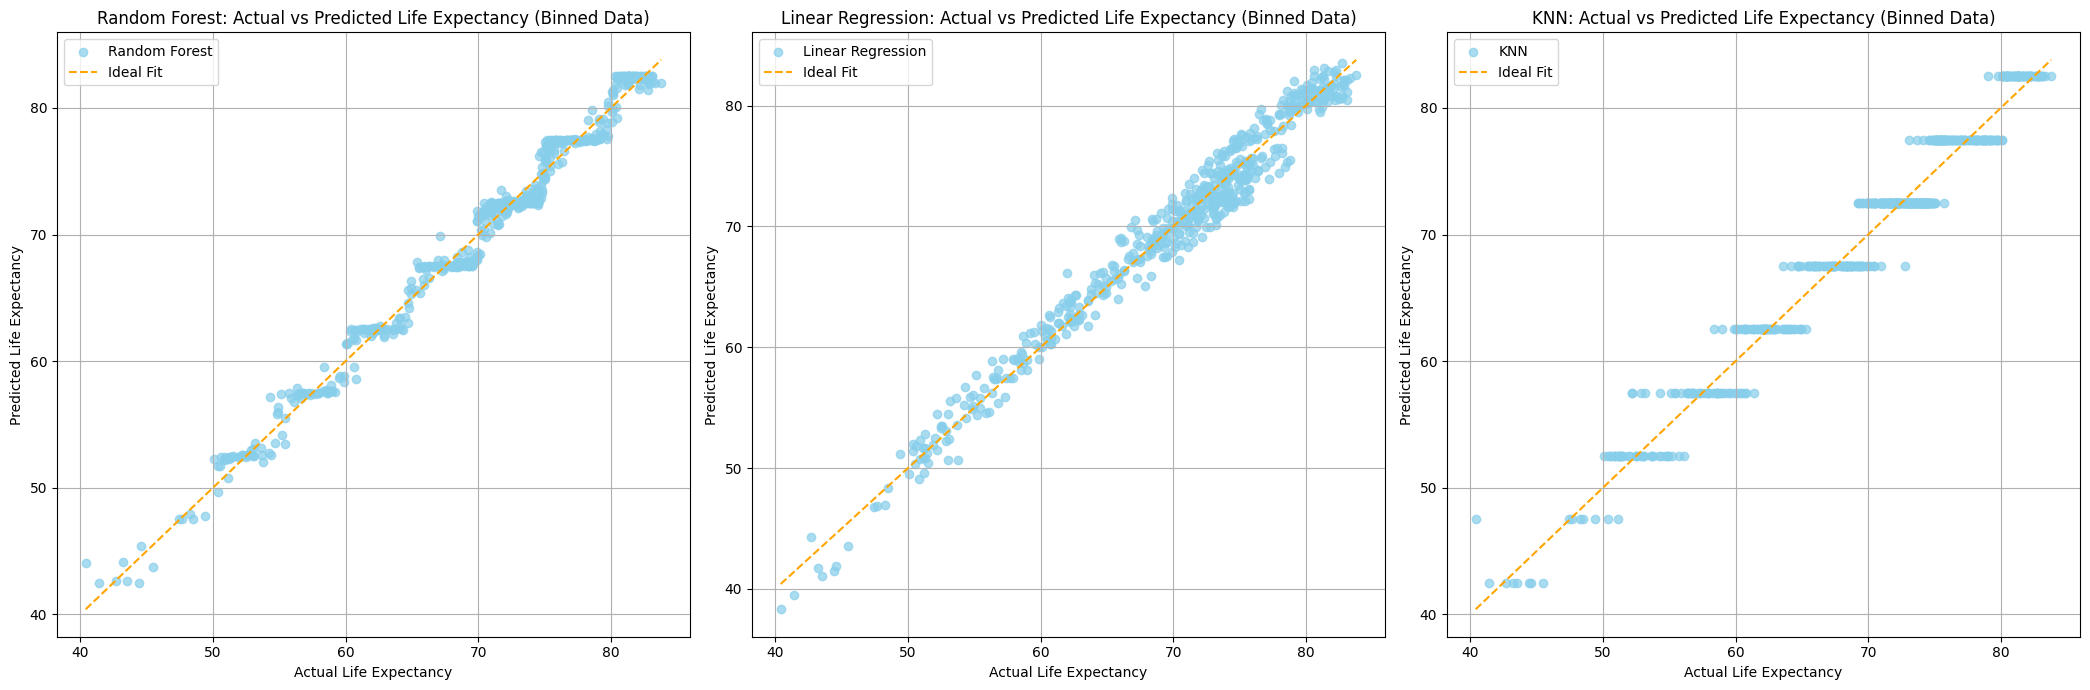

In [55]:
import numpy as np
from sklearn.preprocessing import LabelEncoder
from imblearn.over_sampling import SMOTE

df = pd.read_csv('../data/data.csv')

df = df.drop(['Country', 'Region', 'Year'], axis=1)

X = df.drop('Life_expectancy', axis=1)
y = df['Life_expectancy']

# Bin 'Life_expectancy' into intervals of 5 years from 40 to 85
bins = np.arange(40, 90, 5)
bin_labels = [f"{int(bins[i])}-{int(bins[i+1])}" for i in range(len(bins) - 1)]
df['Life_expectancy_bin'] = pd.cut(df['Life_expectancy'], bins=bins, labels=bin_labels, right=False)

# Encode categorical variables using LabelEncoder
label_encoders = {}
encoded_df = df.copy()
for col in encoded_df.select_dtypes(include='object').columns:
    le = LabelEncoder()
    encoded_df[col] = le.fit_transform(encoded_df[col])
    label_encoders[col] = le

# Define features and target variable
X = encoded_df.drop(columns=['Life_expectancy', 'Life_expectancy_bin'])
y_binned = encoded_df['Life_expectancy_bin']  # Binned target for SMOTE
y_continuous = encoded_df['Life_expectancy']  # Continuous target for regression

# Drop rows with missing target labels
X = X[y_binned.notnull()]
y_binned = y_binned[y_binned.notnull()]
y_continuous = y_continuous[y_binned.index]

# Encode binned target for SMOTE
y_binned_encoded = y_binned.astype('category').cat.codes

# Split data into training and testing sets
X_train_binned, X_test_binned, y_train_binned, y_test_binned = train_test_split(X, y_binned_encoded, test_size=0.2, random_state=1)
_, _, y_train_continuous, y_test_continuous = train_test_split(
    X, y_continuous, test_size=0.2, random_state=1
)

# Apply SMOTE to the training data
smote = SMOTE(random_state=1)
X_resampled, y_resampled_binned = smote.fit_resample(X_train_binned, y_train_binned)

# Map resampled binned target back to continuous target values
y_resampled_continuous = pd.Series(y_resampled_binned).map(
    dict(zip(range(len(bin_labels)), bins[:-1] + 2.5))
)
y_resampled_continuous = y_resampled_continuous.astype(float)

# Scale the resampled training data and original test data
scaler = StandardScaler()
X_train_scaled_binned = scaler.fit_transform(X_resampled)
X_test_scaled_binned = scaler.transform(X_test_binned)

# Random Forest Regressor
rf_binned = RandomForestRegressor(n_estimators=100, random_state=1)
rf_binned.fit(X_train_scaled_binned, y_resampled_continuous)
y_pred_rf_binned = rf_binned.predict(X_test_scaled_binned)

# Linear Regression
lr_binned = LinearRegression()
lr_binned.fit(X_train_scaled_binned, y_resampled_continuous)
y_pred_lr_binned= lr_binned.predict(X_test_scaled_binned)

# K-Nearest Neighbors
knn_binned = KNeighborsRegressor(n_neighbors=1)
knn_binned.fit(X_train_scaled_binned, y_resampled_continuous)
y_pred_knn_binned = knn_binned.predict(X_test_scaled_binned)

# Calculate evaluation metrics for Random Forest
mae_rf_binned = mean_absolute_error(y_test_continuous, y_pred_rf_binned)
mse_rf_binned = mean_squared_error(y_test_continuous, y_pred_rf_binned)
r2_rf_binned = r2_score(y_test_continuous, y_pred_rf_binned)

# Calculate evaluation metrics for Linear Regression
mae_lr_binned = mean_absolute_error(y_test_continuous, y_pred_lr_binned)
mse_lr_binned = mean_squared_error(y_test_continuous, y_pred_lr_binned)
r2_lr_binned = r2_score(y_test_continuous, y_pred_lr_binned)

# Calculate evaluation metrics for KNN
mae_knn_binned = mean_absolute_error(y_test_continuous, y_pred_knn_binned)
mse_knn_binned = mean_squared_error(y_test_continuous, y_pred_knn_binned)
r2_knn_binned = r2_score(y_test_continuous, y_pred_knn_binned)

# Print the evaluation metrics
print("Random Forest Regression Results (Binned and Oversampled Data):")
print(f"Mean Absolute Error (MAE): {mae_rf_binned:.4f}")
print(f"Mean Squared Error (MSE): {mse_rf_binned:.4f}")
print(f"R² Score: {r2_rf_binned:.4f}") 

print("\nLinear Regression Results (Binned and Oversampled Data):")
print(f"Mean Absolute Error (MAE): {mae_lr_binned:.4f}")
print(f"Mean Squared Error (MSE): {mse_lr_binned:.4f}")
print(f"R² Score: {r2_lr_binned:.4f}") 

print("\nK-Nearest Neighbors Regression Results (Binned and Oversampled Data):")
print(f"Mean Absolute Error (MAE): {mae_knn_binned:.4f}")
print(f"Mean Squared Error (MSE): {mse_knn_binned:.4f}")
print(f"R² Score: {r2_knn_binned:.4f}") 

# Plot the two models' predictions against the actual values
plt.figure(figsize=(21, 7))

# Random Forest subplot
plt.subplot(1, 3, 1)
plt.scatter(y_test_continuous, y_pred_rf_binned, alpha=0.7, label="Random Forest", color='skyblue')
plt.plot([y_test_continuous.min(), y_test_continuous.max()], 
         [y_test_continuous.min(), y_test_continuous.max()], '--', label="Ideal Fit", color='orange')
plt.title("Random Forest: Actual vs Predicted Life Expectancy (Binned Data)")
plt.xlabel("Actual Life Expectancy")
plt.ylabel("Predicted Life Expectancy")
plt.legend()
plt.grid(True)

# Linear Regression subplot
plt.subplot(1, 3, 2)
plt.scatter(y_test_continuous, y_pred_lr_binned, alpha=0.7, label="Linear Regression", color='skyblue')
plt.plot([y_test_continuous.min(), y_test_continuous.max()], 
         [y_test_continuous.min(), y_test_continuous.max()], '--', label="Ideal Fit", color='orange')
plt.title("Linear Regression: Actual vs Predicted Life Expectancy (Binned Data)")
plt.xlabel("Actual Life Expectancy")
plt.ylabel("Predicted Life Expectancy")
plt.legend()
plt.grid(True)

# KNN subplot
plt.subplot(1, 3, 3)
plt.scatter(y_test_continuous, y_pred_knn_binned, alpha=0.7, label="KNN", color='skyblue')
plt.plot([y_test_continuous.min(), y_test_continuous.max()], 
         [y_test_continuous.min(), y_test_continuous.max()], '--', label="Ideal Fit", color='orange')
plt.title("KNN: Actual vs Predicted Life Expectancy (Binned Data)")
plt.xlabel("Actual Life Expectancy")
plt.ylabel("Predicted Life Expectancy")
plt.legend()
plt.grid(True)

plt.tight_layout()
plt.show()

#### Finding the optimal n for KNN

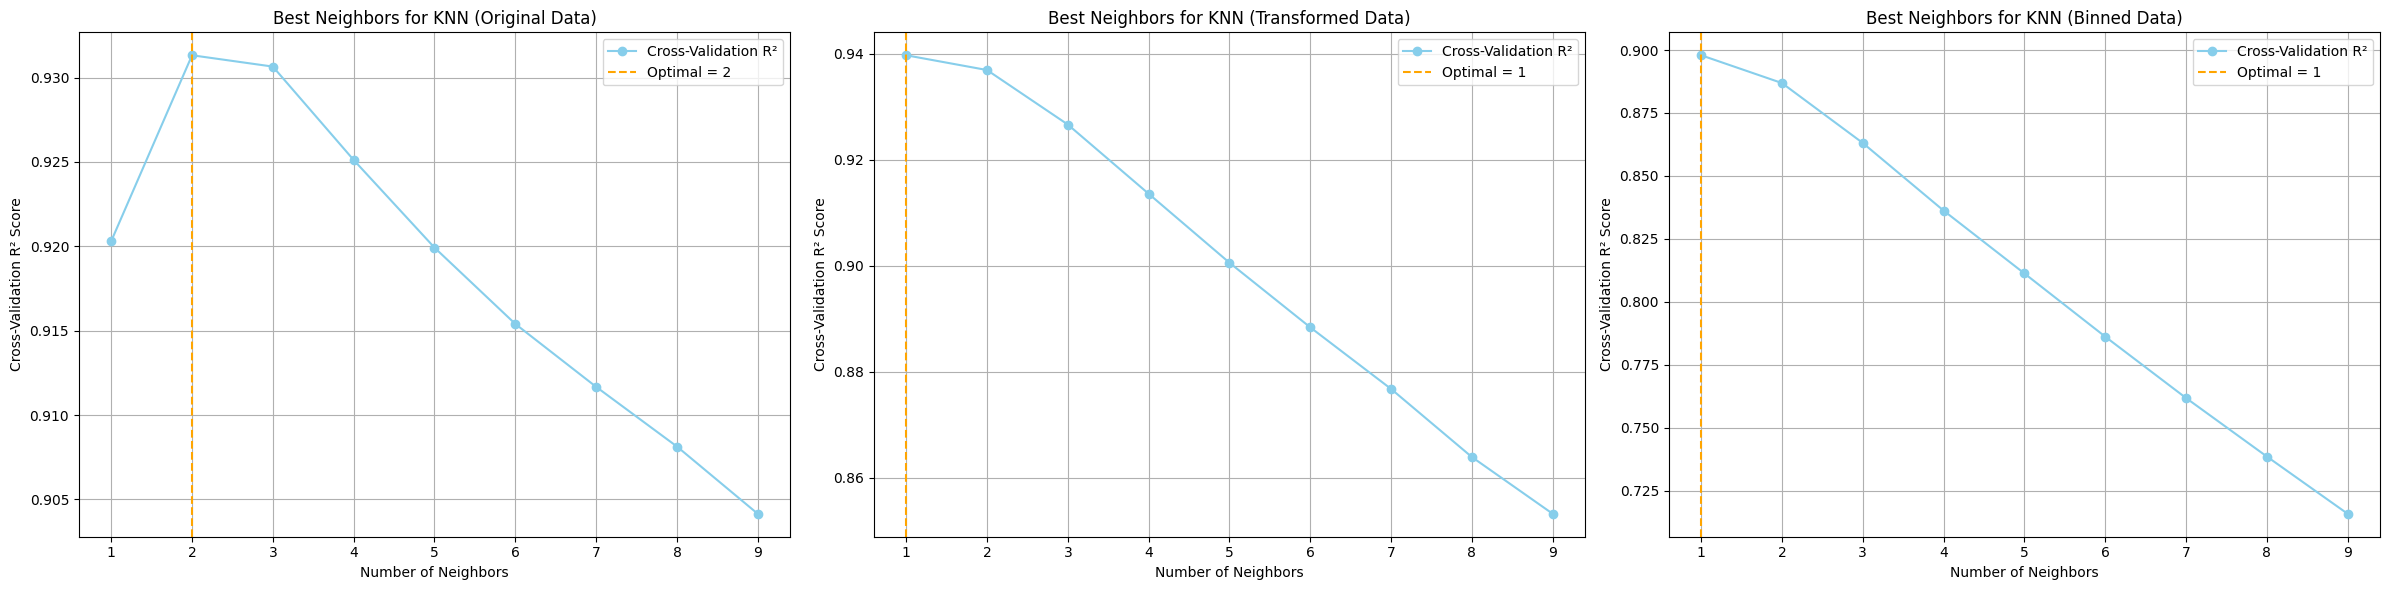

In [56]:
from sklearn.model_selection import cross_val_score

# Define the range of neighbors to test
neighbor_range = range(1, 10) 

# Initialize variables to store cross-validation scores
cv_scores_original = []
cv_scores_transformed = []
cv_scores_binned = []

# Evaluate for original data
for n in neighbor_range:
    knn = KNeighborsRegressor(n_neighbors=n)
    scores = cross_val_score(knn, X_train_binned, y_train_continuous, cv=5, scoring='r2')
    cv_scores_original.append(scores.mean())

# Find the best number of neighbors for original data
best_n_neighbors_original = neighbor_range[np.argmax(cv_scores_original)]

# Evaluate for transformed data
for n in neighbor_range:
    knn = KNeighborsRegressor(n_neighbors=n)
    scores = cross_val_score(knn, X_train_scaled_binned, y_resampled_continuous, cv=5, scoring='r2')
    cv_scores_transformed.append(scores.mean())

# Find the best number of neighbors for transformed data
best_n_neighbors_transformed = neighbor_range[np.argmax(cv_scores_transformed)]

# Evaluate for binned data
cv_scores_binned = []
for n in neighbor_range:
    knn = KNeighborsRegressor(n_neighbors=n)
    scores = cross_val_score(knn, X_resampled, y_resampled_binned, cv=5, scoring='r2')
    cv_scores_binned.append(scores.mean())

# Find the best number of neighbors for binned data
best_n_neighbors_binned = neighbor_range[np.argmax(cv_scores_binned)]

# Initialize subplots
fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(24, 6))

# Plot for original data
ax1.plot(neighbor_range, cv_scores_original, marker='o', linestyle='-', color='skyblue', label="Cross-Validation R²")
ax1.axvline(best_n_neighbors_original, color='orange', linestyle='--',
            label=f"Optimal = {best_n_neighbors_original}")
ax1.set_xticks(list(neighbor_range))  
ax1.set_title("Best Neighbors for KNN (Original Data)")
ax1.set_xlabel("Number of Neighbors")
ax1.set_ylabel("Cross-Validation R² Score")
ax1.legend()
ax1.grid()

# Plot for transformed data
ax2.plot(neighbor_range, cv_scores_transformed, marker='o', linestyle='-', color='skyblue', label="Cross-Validation R²")
ax2.axvline(best_n_neighbors_transformed, color='orange', linestyle='--',
            label=f"Optimal = {best_n_neighbors_transformed}")
ax2.set_xticks(list(neighbor_range))  
ax2.set_title("Best Neighbors for KNN (Transformed Data)")
ax2.set_xlabel("Number of Neighbors")
ax2.set_ylabel("Cross-Validation R² Score")
ax2.legend()
ax2.grid()

# Plot for binned data
ax3.plot(neighbor_range, cv_scores_binned, marker='o', linestyle='-', color='skyblue', label="Cross-Validation R²")
ax3.axvline(best_n_neighbors_binned, color='orange', linestyle='--',
            label=f"Optimal = {best_n_neighbors_binned}")
ax3.set_xticks(list(neighbor_range)) 
ax3.set_title("Best Neighbors for KNN (Binned Data)")
ax3.set_xlabel("Number of Neighbors")
ax3.set_ylabel("Cross-Validation R² Score")
ax3.legend()
ax3.grid()

plt.tight_layout()
plt.show()
